# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
#подключим нампи и отключим вывод ворнингов, чтоб не мылили глаз
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [79]:
#функция работает по такому алгоритму: сначала проверяется на наличие элементов после 0, потом считываются все позиции 0 
#и берется максимум среди всех чисел с позицией на 1 больге 0 с учетом проверки на наличие 0 на последней позиции 
def max_element(arr):
    if len(np.where(arr == 0)[0])==0 or (len(np.where(arr == 0)[0])==1 and arr[-1] == 0):
        return None
    else:
        if arr[-1] == 0:
            return(np.max(arr[np.where(arr == 0)[0][:-1]+1]))
        else:
            return(np.max(arr[np.where(arr == 0)[0]+1]))
  
            

In [3]:
#проверка функции
max_element(np.array([6, 0, -1, 0, 0, 10]))

10

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [19]:
#вытаскиваем позицию минимального элемента в матрице из модуля разности элементов исходной и этого числа, а потом позвращаем число
#с этой позицей в исходной матрице
def nearest_value(X, v):
    return X[np.unravel_index(np.argmin(abs(X - v)), abs(X - v).shape)]

In [29]:
nearest_value(np.arange(-10,10).reshape((4, 5)), -5.6)

-6

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [97]:
#тут все просто, но стоит отметить, что при std = 0 пронормировать не получится
def scale(X):
    if np.any((X.std(axis=0)==0)==True):
        return "One of columns std is equal to 0"
    else:
        return (X-X.mean(axis=0))/X.std(axis=0)
        

In [99]:
scale(np.array([[1000,  10,   0.5],
              [ 100,   5,  0.35],
              [ 1000,   7,  0.09]]))

array([[ 0.70710678,  1.29777137,  1.10207185],
       [-1.41421356, -1.13554995,  0.2164784 ],
       [ 0.70710678, -0.16222142, -1.31855024]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [12]:
#тут тоже ничего необычного, используем встроенные в нампи функции
def get_stats(X):
    print('det =', np.linalg.det(X), '\ntrace =', np.trace(X), '\nmax =', np.amax(X), '\nmin =', np.amin(X), '\nnorm =', 
          np.linalg.norm(X), '\neig =', np.linalg.eig(X), '\ninv =', np.linalg.inv(X))

In [14]:
X = np.random.normal(loc =0, scale =1, size=(2, 2))

In [16]:
get_stats(np.array(X))

det = -0.320067161532 
trace = -0.236554743365 
max = 0.752352831359 
min = -0.583398578431 
norm = 1.02526654563 
eig = (array([-0.69625375,  0.45969901]), array([[-0.81104644, -0.14834335],
       [ 0.58498178, -0.98893592]])) 
inv = [[-1.08365955  0.48885914]
 [ 2.35060925  1.822738  ]]


**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [3]:
#создаем эррэй, в который будем записывать результат каждого эксперемента, а дальше вытаскиваем среднее и 95-персентиль
res = np.array([])
for exp_num in range(100):
    A = np.random.normal(loc =0, scale =1, size=(10, 10))
    B = np.random.normal(loc =0, scale =1, size=(10, 10))
    res = np.append(res, np.amax(np.dot(A, B)))
print(np.mean(res), np.percentile(res, 95))


8.78856570643 12.5932695719


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [2]:
#подключаем пандас и снимаем ограничение с количества столюцов при выводе дф, чтобы было удобнее смотреть
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
#грузим данные
df = pd.read_csv('2008.csv')

In [4]:
#проверяем на пропуски
df.isnull().values.any()

True

Они есть!

In [5]:
#Смотрим сколько пропусков всего
df.isnull().sum().sum()

355215

In [6]:
#Смотрим сколько объектов имеют пропуски
len(df) - len(df.dropna(axis=0, how='any'))

70000

In [7]:
#Смотрим сколько признаков имеют пропуски

len(df.columns) - len(df.dropna(axis=1, how='any').columns)

16

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [52]:
#смотрим, есть ли пропуски в целевой переменной
df.DepDelay.isnull().values.any()

True

Они есть!

In [67]:
#посмотрим, есть ли какая-то особенность у них
df[df['DepDelay'].isnull()==False]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,N640JB,171.0,164.0,153.0,31.0,24.0,PBI,JFK,1028,5.0,13.0,0,NaN,0,13.0,0.0,7.0,0.0,11.0
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,N387SW,74.0,75.0,55.0,-2.0,-1.0,ABQ,PHX,328,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,N3765,342.0,371.0,302.0,-34.0,-5.0,JFK,LAS,2248,9.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,3,4,2,626.0,630,820.0,830,WN,454,N633SW,174.0,180.0,164.0,-10.0,-4.0,MCO,MCI,1072,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,10,6,1,1905.0,1907,24.0,37,UA,270,N421UA,199.0,210.0,177.0,-13.0,-2.0,DEN,PHL,1557,6.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [63]:
df[df['DepDelay'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,NaN,NaN,155.0,NaN,NaN,NaN,DFW,MIA,1121,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,N683BR,NaN,100.0,NaN,NaN,NaN,ATL,CAK,528,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,N990AT,NaN,85.0,NaN,NaN,NaN,BOS,BWI,370,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,N526US,NaN,98.0,NaN,NaN,NaN,MDW,MSP,349,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,NaN,NaN,87.0,NaN,NaN,NaN,DSM,ORD,299,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
194,2008,1,28,1,NaN,1640,NaN,1719,UA,753,NaN,NaN,99.0,NaN,NaN,NaN,CLE,ORD,316,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
204,2008,6,13,5,NaN,1229,NaN,1421,OH,5765,N528CA,NaN,112.0,NaN,NaN,NaN,LGA,RDU,431,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
236,2008,7,19,6,NaN,544,NaN,917,OO,6151,N728SK,NaN,153.0,NaN,NaN,NaN,EUG,DEN,997,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
257,2008,4,19,6,NaN,1345,NaN,1435,AA,1853,NaN,NaN,110.0,NaN,NaN,NaN,DFW,COS,592,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
267,2008,9,23,2,NaN,1400,NaN,1515,WN,2049,NaN,NaN,75.0,NaN,NaN,NaN,OAK,ONT,361,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Все имеют Cancelled = 1 и CancellationCode, то есть это все отмененные рейсы. Можно исключить 2 этих столбца, тк они не несут никакой информации. Помимо этого, удалим пропуски и 0 в целевой переменной.

In [4]:
df = df[df['DepDelay'].isnull()==False]
df = df[df['DepDelay'] != 0]
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,N640JB,171.0,164.0,153.0,31.0,24.0,PBI,JFK,1028,5.0,13.0,0,NaN,0,13.0,0.0,7.0,0.0,11.0
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,N387SW,74.0,75.0,55.0,-2.0,-1.0,ABQ,PHX,328,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,N3765,342.0,371.0,302.0,-34.0,-5.0,JFK,LAS,2248,9.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,3,4,2,626.0,630,820.0,830,WN,454,N633SW,174.0,180.0,164.0,-10.0,-4.0,MCO,MCI,1072,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,10,6,1,1905.0,1907,24.0,37,UA,270,N421UA,199.0,210.0,177.0,-13.0,-2.0,DEN,PHL,1557,6.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(['Cancelled', 'CancellationCode'], 1)

In [6]:
#вытащим целевую переменную
y = df.DepDelay

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

Воспользуемся тем, что минуты всегда занимают последние 2 цифры в числе, а часы занимают все, что идет до минут. 

In [7]:
df.DepTime = df.DepTime.astype(str)
df['DepTime_Hour']=df.DepTime.str[:-4]
df['DepTime_Minute']=df.DepTime.str[-4:-2]

In [8]:
df.CRSDepTime = df.CRSDepTime.astype(str)
df['CRSDepTime_Hour']=df.CRSDepTime.str[:-2]
df['CRSDepTime_Minute']=df.CRSDepTime.str[-2:]

In [9]:
df.ArrTime = df.ArrTime.astype(str)
df['ArrTime_Hour']=df.ArrTime.str[:-4]
df['ArrTime_Minute']=df.ArrTime.str[-4:-2]

In [10]:
df.CRSArrTime = df.CRSArrTime.astype(str)
df['CRSArrTime_Hour']=df.CRSArrTime.str[:-2]
df['CRSArrTime_Minute']=df.CRSArrTime.str[-2:]

In [11]:
#добавим пропуски в новые столбцы из стараых, так как иначе 'nan' разобъется на 'n' и 'an'
df.ix[df.ArrTime == 'nan', 'ArrTime_Hour'] = 'nan'
df.ix[df.ArrTime == 'nan', 'ArrTime_Minute'] = 'nan'



In [16]:
#проверим, есть ли пропуски в других столбцах
df[df['CRSDepTime'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute


In [20]:
df[df['DepTime'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute


In [21]:
df[df['ArrTime'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute


In [19]:
df[df['CRSArrTime'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute


In [18]:
df[df.CRSDepTime == 'nan']

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute


In [22]:
df[df.CRSArrTime == 'nan']

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute


In [23]:
df[df.DepTime == 'nan']

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute


Больше пропусков нет!

In [156]:
df #видим, что есть пустые ячейки в толбцах с часавми, заменяем их нулями

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN,21,11,20,55,23,08,23,00
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN,14,26,14,10,17,30,17,28
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN,11,43,11,45,15,01,15,20
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN,11,41,11,44,13,23,13,35
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN,8,15,8,20,12,43,13,00
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,N640JB,171.0,164.0,153.0,31.0,24.0,PBI,JFK,1028,5.0,13.0,0,13.0,0.0,7.0,0.0,11.0,13,49,13,25,16,40,16,09
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,N387SW,74.0,75.0,55.0,-2.0,-1.0,ABQ,PHX,328,5.0,14.0,0,NaN,NaN,NaN,NaN,NaN,13,59,14,00,14,13,14,15
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,N3765,342.0,371.0,302.0,-34.0,-5.0,JFK,LAS,2248,9.0,31.0,0,NaN,NaN,NaN,NaN,NaN,18,15,18,20,20,57,21,31
8,2008,3,4,2,626.0,630,820.0,830,WN,454,N633SW,174.0,180.0,164.0,-10.0,-4.0,MCO,MCI,1072,4.0,6.0,0,NaN,NaN,NaN,NaN,NaN,6,26,6,30,8,20,8,30
9,2008,10,6,1,1905.0,1907,24.0,37,UA,270,N421UA,199.0,210.0,177.0,-13.0,-2.0,DEN,PHL,1557,6.0,16.0,0,NaN,NaN,NaN,NaN,NaN,19,05,19,07,,24,,37


In [12]:
df.ix[df.ArrTime_Hour == '', 'ArrTime_Hour'] = '0'
df.ix[df.CRSArrTime_Hour == '', 'CRSArrTime_Hour'] = '0'
df.ix[df.DepTime_Hour == '', 'DepTime_Hour'] = '0'
df.ix[df.CRSDepTime_Hour == '', 'CRSDepTime_Hour'] = '0'


In [158]:
df #теперь все ок

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN,21,11,20,55,23,08,23,00
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN,14,26,14,10,17,30,17,28
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN,11,43,11,45,15,01,15,20
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN,11,41,11,44,13,23,13,35
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN,8,15,8,20,12,43,13,00
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,N640JB,171.0,164.0,153.0,31.0,24.0,PBI,JFK,1028,5.0,13.0,0,13.0,0.0,7.0,0.0,11.0,13,49,13,25,16,40,16,09
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,N387SW,74.0,75.0,55.0,-2.0,-1.0,ABQ,PHX,328,5.0,14.0,0,NaN,NaN,NaN,NaN,NaN,13,59,14,00,14,13,14,15
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,N3765,342.0,371.0,302.0,-34.0,-5.0,JFK,LAS,2248,9.0,31.0,0,NaN,NaN,NaN,NaN,NaN,18,15,18,20,20,57,21,31
8,2008,3,4,2,626.0,630,820.0,830,WN,454,N633SW,174.0,180.0,164.0,-10.0,-4.0,MCO,MCI,1072,4.0,6.0,0,NaN,NaN,NaN,NaN,NaN,6,26,6,30,8,20,8,30
9,2008,10,6,1,1905.0,1907,24.0,37,UA,270,N421UA,199.0,210.0,177.0,-13.0,-2.0,DEN,PHL,1557,6.0,16.0,0,NaN,NaN,NaN,NaN,NaN,19,05,19,07,0,24,0,37


In [13]:
#выкидымаем старые столбцы
df = df.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], 1)

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Это явно ArrDelay. А еще все те признаки, которые я только что преобразовывал, так как они попарно описывают полностью DepDelay и ArrDelay. Длины задержек по разным причинам я решил отсавить, так как они сильно влияют на пргонозируемую переменную только вместе, а когда я строил модели без них, то получалась дико низкая точность, что меня сильно угнетало.

In [26]:
#посмотрим на корреляции
df.corr()

,Year,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.004838,-0.010617,0.006598,-0.014230,-0.005765,-0.012840,-0.041950,-0.029528,-0.006289,0.007768,-0.014431,0.000721,-0.008286,0.017684,0.000651,0.008620,0.017445
DayofMonth,NaN,-0.004838,1.000000,0.015818,0.009847,-0.008110,-0.007024,-0.007842,0.006479,0.008574,-0.007196,-0.002673,-0.002481,0.002144,0.008789,0.002709,0.008594,-0.007752,0.009641
DayOfWeek,NaN,-0.010617,0.015818,1.000000,-0.005878,0.010330,0.013325,0.011541,0.002943,0.008530,0.014755,0.001024,-0.005622,0.004786,0.015026,-0.012198,0.000053,0.005031,0.007566
FlightNum,NaN,0.006598,0.009847,-0.005878,1.000000,-0.324021,-0.331409,-0.336906,0.027777,0.021166,-0.350380,-0.005973,0.002628,-0.003012,0.076525,0.060002,0.013833,0.009387,-0.022415
ActualElapsedTime,NaN,-0.014230,-0.008110,0.010330,-0.324021,1.000000,0.979979,0.984401,0.089451,0.041946,0.965089,0.154726,0.264840,NaN,-0.039599,-0.011799,0.183883,0.002250,-0.085353
CRSElapsedTime,NaN,-0.005765,-0.007024,0.013325,-0.331409,0.979979,1.000000,0.988293,0.010358,0.034302,0.983478,0.100990,0.140438,0.021977,-0.004071,-0.018638,0.043392,0.003952,-0.041558
AirTime,NaN,-0.012840,-0.007842,0.011541,-0.336906,0.984401,0.988293,1.000000,0.031206,0.025237,0.983222,0.082090,0.105578,NaN,-0.017756,-0.024191,0.061818,0.004590,-0.060884
ArrDelay,NaN,-0.041950,0.006479,0.002943,0.027777,0.089451,0.010358,0.031206,1.000000,0.933526,0.003952,0.117087,0.319716,NaN,0.501776,0.254704,0.370920,0.008990,0.509705
DepDelay,NaN,-0.029528,0.008574,0.008530,0.021166,0.041946,0.034302,0.025237,0.933526,1.000000,0.024252,0.020640,0.101294,0.027166,0.532696,0.238872,0.171591,0.010668,0.553806


В остальном все ок

In [14]:
df = df.drop(['Year', 'TailNum', 'ArrDelay', 'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute',
'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute'], 1)


Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [28]:
import matplotlib.pyplot as plt

In [15]:
X = df.drop(['DepDelay'], 1)


In [16]:
#сконвертируем те данные, которые должны быть категориальными
X['Month'] = X['Month'].apply(str)
X['DayofMonth'] = X['DayofMonth'].apply(str)
X['DayOfWeek'] = X['DayOfWeek'].apply(str)
X['FlightNum'] = X['FlightNum'].apply(str)

In [17]:
X.dtypes

Month                 object
DayofMonth            object
DayOfWeek             object
UniqueCarrier         object
FlightNum             object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [32]:
X

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted
0,6,18,3,WN,242,57.0,65.0,46.0,MDW,CLE,307,3.0,8.0,0
1,6,4,3,XE,2380,124.0,138.0,108.0,IAH,AVL,834,4.0,12.0,0
2,8,3,7,WN,1769,138.0,155.0,125.0,MDW,TPA,997,4.0,9.0,0
3,1,23,3,OO,3802,102.0,111.0,79.0,SLC,FCA,532,4.0,19.0,0
4,5,4,7,WN,399,148.0,160.0,136.0,LAS,AUS,1090,4.0,8.0,0
5,1,3,4,B6,834,171.0,164.0,153.0,PBI,JFK,1028,5.0,13.0,0
6,3,31,1,WN,1589,74.0,75.0,55.0,ABQ,PHX,328,5.0,14.0,0
7,4,22,2,DL,617,342.0,371.0,302.0,JFK,LAS,2248,9.0,31.0,0
8,3,4,2,WN,454,174.0,180.0,164.0,MCO,MCI,1072,4.0,6.0,0
9,10,6,1,UA,270,199.0,210.0,177.0,DEN,PHL,1557,6.0,16.0,0


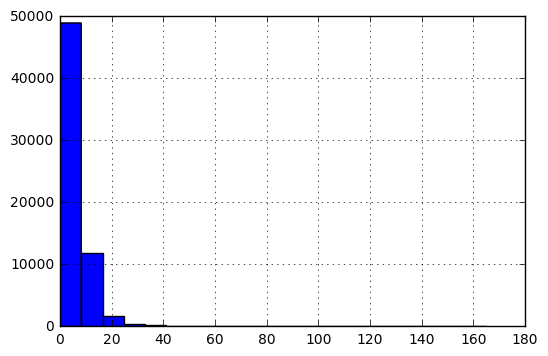

In [34]:
X['TaxiIn'].hist(bins=20)
plt.show()

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

переменные для 2 из 3х графиков я уже удалил, но явно на одном наблюдается наличие аутлайеров, которые могут сильно помешать модели при обучении, а также появится возможность более точно интерпретировать величины коэффициентов.

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
#вот функция, в принципе, тут ничего необычного
def transform_data(data):
    for col in data.columns:
        print(col)
        if data[col].dtype.name == 'int64' or data[col].dtype.name == 'float64':
            data[col] = data[col].fillna(0)
            data[col] = StandardScaler().fit_transform(data[col])
        else:
            data = pd.get_dummies(data, columns=[col])
    return data

In [20]:
#удалим еще 2 перменные, чтоб не перегружать модель слишком большим числом признаков
X = X.drop(['DayofMonth', 'FlightNum'], 1)
#первая перменная вряд ли несет смысл, а вторая имеет очень много уникальных значений, а также ее смысл передают
#uniquecarrier, origin и dest в совокупности

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [21]:
X = transform_data(X)

Month
DayOfWeek
UniqueCarrier
ActualElapsedTime


C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has 

CRSElapsedTime
AirTime
Origin
Dest
Distance
TaxiIn
TaxiOut
Diverted
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay


C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has 

In [22]:
print('итого', len(X.columns), 'признаков')

итого 645 признаков


**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [25]:
#сделаем сэмплы, применим рандом стэйт, чтобы они соответствовали друг другу
X_train_sample = X_train.sample(n=1000, random_state=42)
y_train_sample = y_train.sample(n=1000, random_state=42)


In [26]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
regr = linear_model.LinearRegression()
regr.fit(X_train_sample, y_train_sample)
y_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train_sample)

print('Coefficients: \n', regr.coef_)


Coefficients: 
 [ -6.21249036e+02   4.24762343e+01   5.53943428e+02   1.17352459e+00
   3.95325507e+01   9.24057773e+01  -6.83892618e+00   2.04843297e+01
   9.21907864e+00   1.69075874e+01   1.27899980e+00   2.16818031e+01
   1.88537080e+13   1.88537080e+13   1.88537080e+13   1.88537080e+13
   1.88537080e+13   1.88537080e+13   1.88537080e+13   1.88537080e+13
   1.88537080e+13   1.88537080e+13   1.88537080e+13   1.88537080e+13
   9.75761894e+12   9.75761894e+12   9.75761894e+12   9.75761894e+12
   9.75761894e+12   9.75761894e+12   9.75761894e+12   1.15413873e+13
   1.15413873e+13   3.05274399e+13   1.15413873e+13   1.15413873e+13
   1.15413873e+13   1.15413873e+13   1.15413873e+13   1.15413873e+13
   1.15413873e+13   1.15413873e+13   1.15413873e+13   1.15413873e+13
   1.15413873e+13   1.15413873e+13   1.15413873e+13   1.15413873e+13
   1.15413873e+13   1.15413873e+13   1.15413873e+13  -2.46172944e+11
   4.99401288e+11   4.99401288e+11   1.40421246e+12   2.75726873e+12
   4.99401288e+11 

In [28]:
#посмотрим на веса
pd.DataFrame({'Признак':X.columns, 'Вес':regr.coef_}, columns = ['Признак', 'Вес'])

,Признак,Вес
0,ActualElapsedTime,-6.212490e+02
1,CRSElapsedTime,4.247623e+01
2,AirTime,5.539434e+02
3,Distance,1.173525e+00
4,TaxiIn,3.953255e+01
5,TaxiOut,9.240578e+01
6,Diverted,-6.838926e+00
7,CarrierDelay,2.048433e+01
8,WeatherDelay,9.219079e+00
9,NASDelay,1.690759e+01


In [29]:
print("Test mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Train mean squared error: %.2f" % mean_squared_error(y_train_sample, y_train_pred))


Test mean squared error: 479191390980120472715264.00
Train mean squared error: 34.61


In [30]:
print('Test variance score: %.2f' % r2_score(y_test, y_pred))
print('Train variance score: %.2f' % r2_score(y_train_sample, y_train_pred))

Test variance score: -358228682933576663040.00
Train variance score: 0.98


Большой вес у некоторых дамми переменных, так как они встречаются малое количество раз и могут полностью определять тот или иной прецедент, таким образом на тестовой выборке, где аналогичных случаев не наблюдается, а, наоборот, появлется множетсво других, точность модели никакая

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [31]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV


In [32]:
lasso=LassoCV(cv=KFold(n_splits=5)).fit(X_train_sample, y_train_sample)
y_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train_sample)
print("Test mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Train mean squared error: %.2f" % mean_squared_error(y_train_sample, y_train_pred))
print('Test variance score: %.2f' % r2_score(y_test, y_pred))
print('Train variance score: %.2f' % r2_score(y_train_sample, y_train_pred))

Test mean squared error: 83.89
Train mean squared error: 57.21
Test variance score: 0.94
Train variance score: 0.97


In [33]:
ridge=RidgeCV(cv=KFold(n_splits=5)).fit(X_train_sample, y_train_sample)
y_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train_sample)
print('Test variance score: %.2f' % r2_score(y_test, y_pred))
print('Train variance score: %.2f' % r2_score(y_train_sample, y_train_pred))

Test variance score: 0.93
Train variance score: 0.98


Как мы видим, обе регуляризации отлично справились со своей задачей, точность на тестовой выборке теперь стала тоже очень высокой.

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [193]:
train1 = [1]*len(X_train)
test1 = [1]*len(X_test)
X_train['1'] = train1
X_test['1'] = test1


**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [115]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.dot(X,w)


In [48]:
X = np.array([[1, 1], [2,2]])
w = np.array([1,2])
make_pred(X, w)

array([3, 6])

In [116]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    y_hat = make_pred(X, w)
    mspe = 0
    for i in range(len(y)):
        mspe += ((y[i]-y_hat[i])/y[i])**2
    mspe = mspe/len(y)
    return mspe

In [87]:
X = np.array([[1, 1], [2,2], [3,3]])
w = np.array([1,1])
y = np.array([1,1,1])
get_func(w, X, y)

11.666666666666666

In [117]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    grad = [0]*len(w)
    for i in range(len(y)):
        grad += 2*(np.dot(X[i], w)/y[i]-1)*X[i]/y[i]
    grad = grad/len(y)
    return grad
        
        

In [88]:
X = np.array([[1, 1], [2,2], [3,3]])
w = np.array([1,1])
y = np.array([1,1,1])
get_grad(w, X, y)

array([ 14.66666667,  14.66666667])

In [118]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    y_hat = make_pred(X, w)
    mspe = 0
    for i in range(len(y)):
        mspe += ((y[i]-y_hat[i])/y[i])**2
    mspe = mspe/len(y) + np.linalg.norm(w)**2
    return mspe

In [91]:
X = np.array([[1, 1], [2,2], [3,3]])
w = np.array([1,1])
y = np.array([1,1,1])
get_reg_func(w, X, y)

13.666666666666666

In [119]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    grad = [0]*len(w)
    for i in range(len(y)):
        grad += 2*(np.dot(X[i], w)/y[i]-1)*X[i]/y[i]
    grad = grad/len(y) + 2*w
    return grad

In [68]:
X = np.array([[1, 1], [2,2]])
w = np.array([1,1])
y = np.array([1,1])
get_reg_grad(w, X, y)

array([ 9.,  9.])

В функциях вроде ничего пояснять не надо, все довольно однозначно.

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [196]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    mspe = []
    if is_reg:
        for i in range(max_iter):
            mspe.append(get_reg_func(w0, X, y))
            w = w0 - step_size*get_reg_grad(w0, X, y)
            if np.linalg.norm(w - w0) < eps:
                break
            w0 = w
        return w, mspe
    else:
        for i in range(max_iter):
            mspe.append(get_func(w0, X, y))
            w = w0 - step_size*get_grad(w0, X, y)
            if np.linalg.norm(w - w0) < eps:
                break
            w0 = w
        return w, mspe

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [194]:
#я решил тут тоже использовать сэмплы, так как иначе модель спускается слишком долго
X_train_sample = X_train.sample(n=1000, random_state=42)
y_train_sample = y_train.sample(n=1000, random_state=42)

Далее применим модель для разных шагов и запишем результаты

In [197]:
X = np.array(X_train_sample)
y = np.array(y_train_sample)
w0 = [0]*np.shape(X)[1]
step_size = 0.001
max_iter = 1000
eps = 0.00001
is_reg = False
a = grad_descent(X, y, w0, step_size, max_iter, eps, is_reg)
w1 = a[0]
mspe1 = a[1]

In [198]:
X = np.array(X_train_sample)
y = np.array(y_train_sample)
w0 = [0]*np.shape(X)[1]
step_size = 1
max_iter = 1000
eps = 0.00001
is_reg = False
a = grad_descent(X, y, w0, step_size, max_iter, eps, is_reg)
w2 = a[0]
mspe2 = a[1]

In [199]:
X = np.array(X_train_sample)
y = np.array(y_train_sample)
w0 = [0]*np.shape(X)[1]
step_size = 10
max_iter = 1000
eps = 0.00001
is_reg = False
a = grad_descent(X, y, w0, step_size, max_iter, eps, is_reg)
w3 = a[0]
mspe3 = a[1]

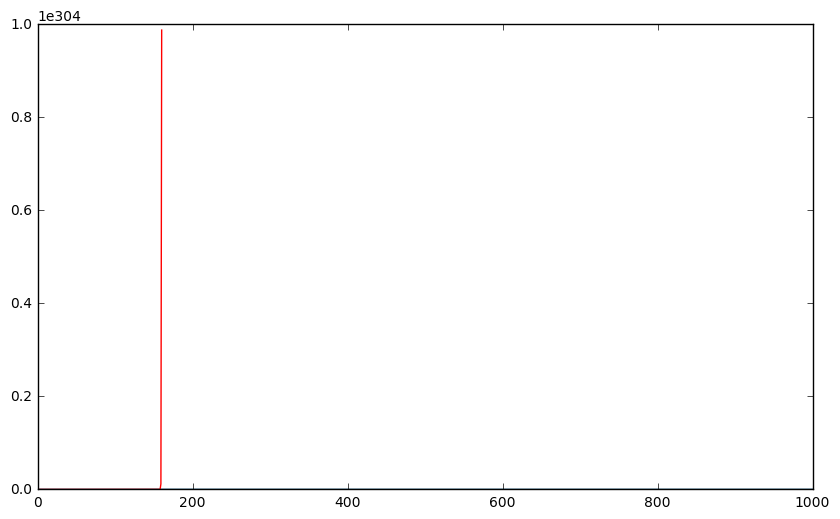

In [200]:
fig = plt.figure(figsize=(10,6))
plt.plot(mspe1)
plt.plot(mspe2)
plt.plot(mspe3)
plt.show()

При шаге 10 функионал улетает в бесконечность(

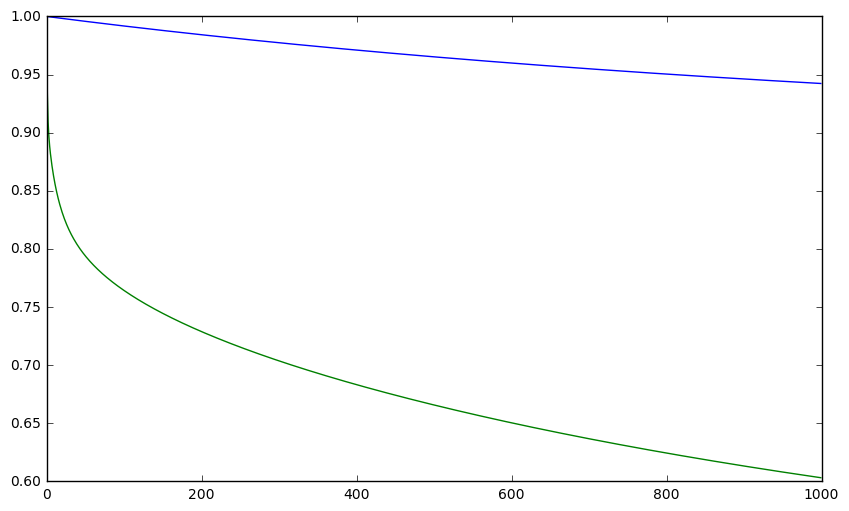

In [201]:
fig = plt.figure(figsize=(10,6))
plt.plot(mspe1)
plt.plot(mspe2)
plt.show()

Сильно заметна величина в скорости сходимости 

In [202]:
X = np.array(X_train_sample)
y = np.array(y_train_sample)
w0 = np.random.rand(np.shape(X)[1])
step_size = 0.001
max_iter = 1000
eps = 0.00001
is_reg = False
a = grad_descent(X, y, w0, step_size, max_iter, eps, is_reg)
w4 = a[0]
mspe4 = a[1]

In [206]:
X = np.array(X_train_sample)
y = np.array(y_train_sample)
w0 = np.random.rand(np.shape(X)[1])
step_size = 1
max_iter = 1000
eps = 0.00001
is_reg = False
a = grad_descent(X, y, w0, step_size, max_iter, eps, is_reg)
w5 = a[0]
mspe5 = a[1]

In [207]:
X = np.array(X_train_sample)
y = np.array(y_train_sample)
w0 = np.random.rand(np.shape(X)[1])
step_size = 10
max_iter = 1000
eps = 0.00001
is_reg = False
a = grad_descent(X, y, w0, step_size, max_iter, eps, is_reg)
w6 = a[0]
mspe6 = a[1]

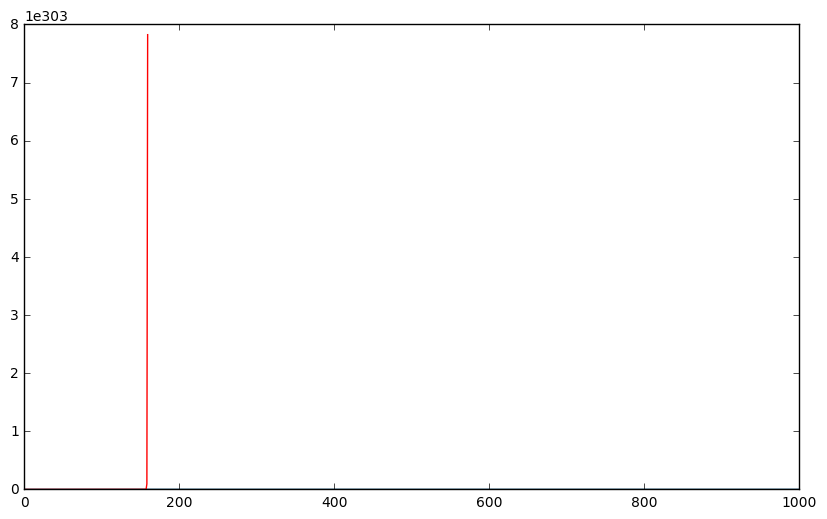

In [208]:
fig = plt.figure(figsize=(10,6))
plt.plot(mspe4)
plt.plot(mspe5)
plt.plot(mspe6)
plt.show()

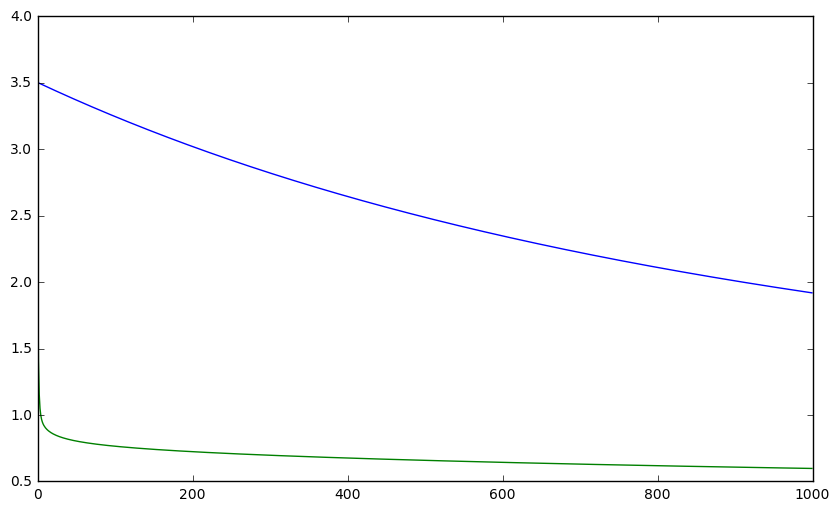

In [204]:
fig = plt.figure(figsize=(10,6))
plt.plot(mspe4)
plt.plot(mspe5)
plt.show()

При рандомных весах скорость зависит от начального положения функции

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [222]:
X = np.array(X_train_sample)
y = np.array(y_train_sample)
w0 = np.array([0]*np.shape(X)[1])
step_size = 0.01
max_iter = 1000
eps = 0.00001
is_reg = True
a = grad_descent(X, y, w0, step_size, max_iter, eps, is_reg)
w_reg = a[0]
mspe_reg = a[1]

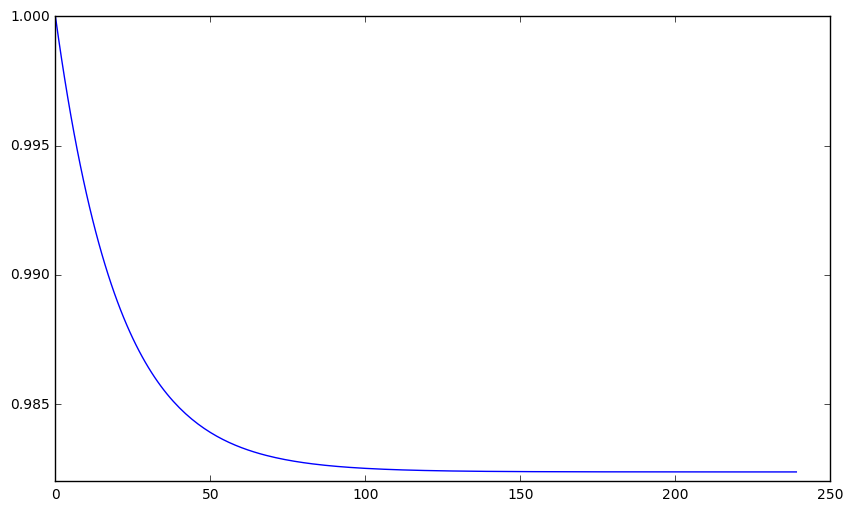

In [223]:
fig = plt.figure(figsize=(10,6))
plt.plot(mspe_reg)
plt.show()
##сходится намного быстрее

При появлении штрафа функция сходится на порядок быстрее, джае не пробегаю максимум шагов

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [224]:
regr = linear_model.LinearRegression()
regr.fit(X_train_sample, y_train_sample)
y_pred = regr.predict(X_test)

In [226]:
get_func(np.array(regr.coef_), np.array(X_test), np.array(y_test))

4.3167924976704387e+24

In [227]:
get_func(w_reg, np.array(X_test), np.array(y_test))

0.96977139194915585

в п. 17 меньше, так как есть штраф на веса, а без него получается опять переобучение, что не дает достичь высокого результата на тестовой выборке. 